### Import Libraries

In [53]:
import pickle
import pandas as pd

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm

import pprint
from matplotlib import pyplot as plt


### Import Scaler

In [39]:
def load(filename = "scaler.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 

    except FileNotFoundError: 
        print("File not found!")

scaler = load("scaler.pickle")

### Import Cleaned Data

In [40]:
data = pd.read_csv('cleaned_data.csv')

In [41]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,...,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.601457,0.998969,0.796887,0.302646,1.256969e-04,0.0,0.458143,...,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.610235,0.998946,0.797380,0.303556,2.897851e-04,0.0,0.461867,...,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.601450,0.998857,0.796403,0.302035,2.361297e-04,25500000.0,0.458521,...,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.583541,0.998700,0.796967,0.303350,1.078888e-04,0.0,0.465705,...,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.598783,0.998973,0.797366,0.303475,7.890000e+09,0.0,0.462746,...,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,1,0.035490


### Create Training Folds

In [42]:
X = data.drop(['Bankrupt?'], axis=1)
Y = data['Bankrupt?']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=.25, random_state=42)

### Train & Test Model

In [33]:
from sklearn import svm

In [45]:
clf = svm.SVC().fit(X_train,Y_train)
y_pred = clf.predict(X_train)

### Import Scoring func

In [32]:
from model_scoring import scoring

'The accuracy score of the model is: 0.970082127493156 '
'The precision score of the model is: 0.0 '
'The recall score of the model is: 0.0 '
'The ROC AUC score of the model is: 0.5 '


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


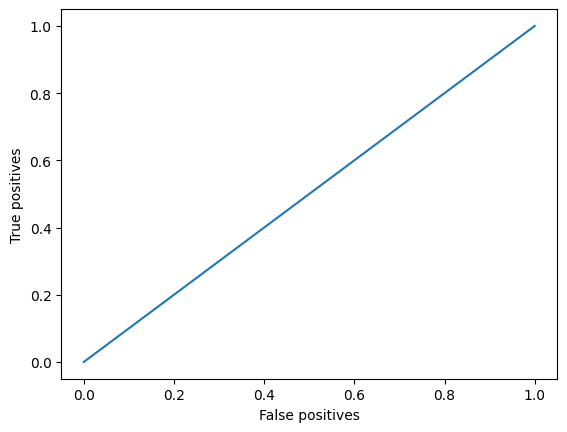

In [61]:
scoring(Y_train,y_pred)